In [27]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [28]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [29]:
NUM_CLASSES = 10

# 学習データ読み込み

In [30]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [31]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# モデルチェックポイントのコールバック
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

cp_callback = tf.keras.callbacks.ModelCheckpoint(

    model_save_path, verbose=1, save_weights_only=False)

# 早期打ち切り用コールバック

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [36]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [37]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 16s 626ms/step - accuracy: 0.2031 - loss: 2.3342
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1453 - loss: 2.3401 - val_accuracy: 0.2090 - val_loss: 2.2233
Epoch 2/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2031 - loss: 2.2176
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1872 - loss: 2.2282 - val_accuracy: 0.3095 - val_loss: 2.1167
Epoch 3/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1953 - loss: 2.2141
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2389 - loss: 2.1502 - val_accuracy: 0.3104 - val_loss: 2.0232
Epoch 4/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3203 - loss: 2.0684
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [38]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9583 - loss: 0.1260


In [39]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [40]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[4.0389363e-09 9.6226251e-01 1.2019341e-05 3.3502689e-16 1.4205733e-11
 5.5293201e-12 1.1537048e-07 1.9723263e-06 3.7710730e-02 1.2754441e-05]
1


# 混同行列

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


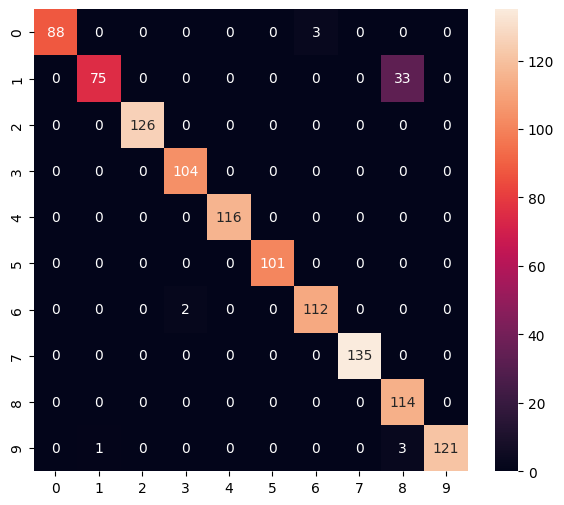

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        91
           1       0.99      0.69      0.82       108
           2       1.00      1.00      1.00       126
           3       0.98      1.00      0.99       104
           4       1.00      1.00      1.00       116
           5       1.00      1.00      1.00       101
           6       0.97      0.98      0.98       114
           7       1.00      1.00      1.00       135
           8       0.76      1.00      0.86       114
           9       1.00      0.97      0.98       125

    accuracy                           0.96      1134
   macro avg       0.97      0.96      0.96      1134
weighted avg       0.97      0.96      0.96      1134



In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [42]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [43]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SULAVM~1\AppData\Local\Temp\tmp4r8qqg0n\assets


INFO:tensorflow:Assets written to: C:\Users\SULAVM~1\AppData\Local\Temp\tmp4r8qqg0n\assets


Saved artifact at 'C:\Users\SULAVM~1\AppData\Local\Temp\tmp4r8qqg0n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2163847622544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163847620816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163847618704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163847614096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163847623312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163912594192: TensorSpec(shape=(), dtype=tf.resource, name=None)


6804

# 推論テスト

In [44]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [45]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [46]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [47]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.0389363e-09 9.6226251e-01 1.2019329e-05 3.3502557e-16 1.4205731e-11
 5.5293196e-12 1.1537048e-07 1.9723243e-06 3.7710655e-02 1.2754428e-05]
1
